# Chapter 14: Singular Value Decomposition

## Concepts

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [8]:
# How numpy computes matrix rank

matrix_a = np.random.randn(3, 4)

def matrix_rank(M):
    S = np.linalg.svd(M, compute_uv=False)
    tol = S.max() * max(M.shape[-2:]) * np.finfo(S.dtype).eps
    return np.count_nonzero(S > tol)

rank_a = matrix_rank(matrix_a)
rank_b = np.linalg.matrix_rank(matrix_a)

check = rank_a == rank_b
print("My implementation for calculating matrix rank matches numpy's:", check)

My implementation for calculating matrix rank matches numpy's: True


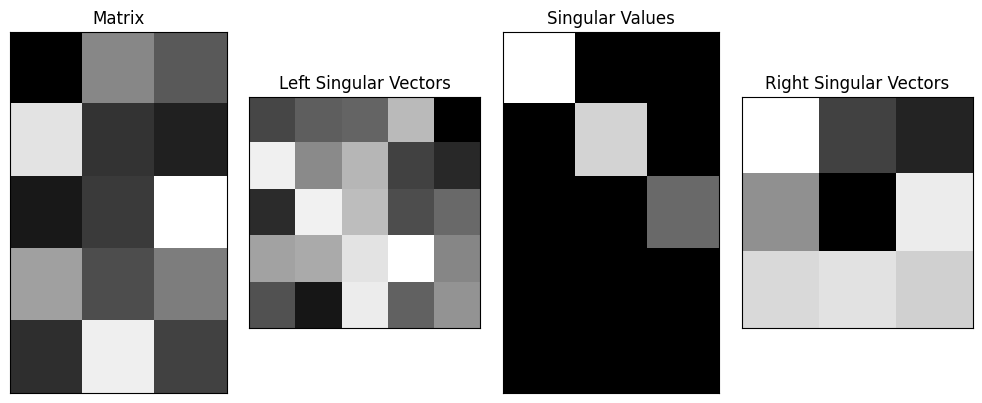

In [9]:
# Singular Value Decomposition (SVD)

matrix_a = np.random.randn(5, 3)

U, s, Vt = np.linalg.svd(matrix_a)

# Create singular values matrix
S = np.zeros(np.shape(matrix_a))
np.fill_diagonal(S, s)

# Create plot
fig, axis = plt.subplots(1, 4, figsize=(10, 4))
titles = ['Matrix', 'Left Singular Vectors', 'Singular Values', 'Right Singular Vectors']
matrices = [matrix_a, U, S, Vt]

for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [21]:
# Symmetrical Matrix (Eigenvalues & Singular values are the same!)

matrix_a = np.random.randn(7, 3)
symmetrical_matrix_a = matrix_a.T @ matrix_a

sinvals = np.linalg.svd(symmetrical_matrix_a)[1]
evals = np.linalg.eig(symmetrical_matrix_a)[0]

check = np.allclose(np.sort(np.round(sinvals, 5)), np.sort(np.round(evals, 5)))
print("Singular values and Eigenvalues are the same for Symmetrical Matrix:", check)

Singular values and Eigenvalues are the same for Symmetrical Matrix: True


## Code Exercises

In [68]:
# Exercise 14-1 (Compare singular vectors and eigenvectors for a symmetrical matrix)

def compare_singular_vectors_and_eigenvectors(matrix):
    # eigendecomposition
    evals, evecs = np.linalg.eig(matrix)
    
    # Sort eigenvalues and evecs
    sort_index = np.argsort(np.abs(evals))[::-1]
    evals = evals[sort_index]
    evecs = evecs[:, sort_index]

    # SVD
    U, s, Vt = np.linalg.svd(matrix)

    # Allow for flexible sign comparison
    for i in range(len(s)):
        evecs[:, i] *= np.sign(evecs[0, i])  # Normalize sign based on first element
        U[:, i] *= np.sign(U[0, i])
        Vt[:, i] *= np.sign(Vt[0, i])

    # Compare Singular Vectors and Eigenvectors
    check_1 = np.allclose(np.abs(evecs), np.abs(U))
    check_2 = np.allclose(np.abs(evecs), np.abs(Vt.T))
    print("Singular vectors and eigenvectors are the same for the input matrix, disregarding sign:", check_1 and check_2)

# Create comparison for symmetrical matrix
matrix_a = np.random.randn(5,5)
symmetrical_matrix_a = matrix_a.T @ matrix_a
compare_singular_vectors_and_eigenvectors(symmetrical_matrix_a)

# Create comparison for symmetrical matrix using additive method
matrix_b = np.random.randn(5,5)
symmetrical_matrix_b = matrix_b.T + matrix_b
compare_singular_vectors_and_eigenvectors(symmetrical_matrix_b)

Singular vectors and eigenvectors are the same for the input matrix, disregarding sign: True
Singular vectors and eigenvectors are the same for the input matrix, disregarding sign: True


In [85]:
# Exercise 14-2 (Calculate economy singular value matrices using numpy)

def compute_economy_svd_and_validate_dimensions(matrix_a):
    """Compute the economy SVD of a non-square matrix A and validate dimensions."""
    # Compute the economy SVD
    U, s, Vt = np.linalg.svd(matrix_a, full_matrices=False)
    
    # Verify dimensions
    m, n = matrix_a.shape
    min_dim = min(m, n)
    correct_dimensions = (U.shape[1] == min_dim and Vt.shape[0] == min_dim and len(s) == min_dim)
    
    print(f"Dimensions correctly truncated to min(m, n): {correct_dimensions}")

# Example use
matrix_a = np.random.randn(10, 4)
compute_economy_svd_and_validate_dimensions(matrix_a)

matrix_b = np.random.randn(4, 10)
compute_economy_svd_and_validate_dimensions(matrix_b)

Dimensions correctly truncated to min(m, n): True
Dimensions correctly truncated to min(m, n): True


In [94]:
# Exercise 14-3 (Confirm that Singular Value Matrices rotate but do not scale vectors)

matrix_a = np.random.randn(5, 5)
vector_a = np.random.randn(5)
U, s, Vt = np.linalg.svd(matrix_a)

matrix_vector_product = U @ vector_a

check = np.linalg.norm(vector_a) == np.linalg.norm(matrix_vector_product)
print("Magnitudes of Random Vector and Singular Vector Matrix @ Random Vector are the same:", check)

Magnitudes of Random Vector and Singular Vector Matrix @ Random Vector are the same: True


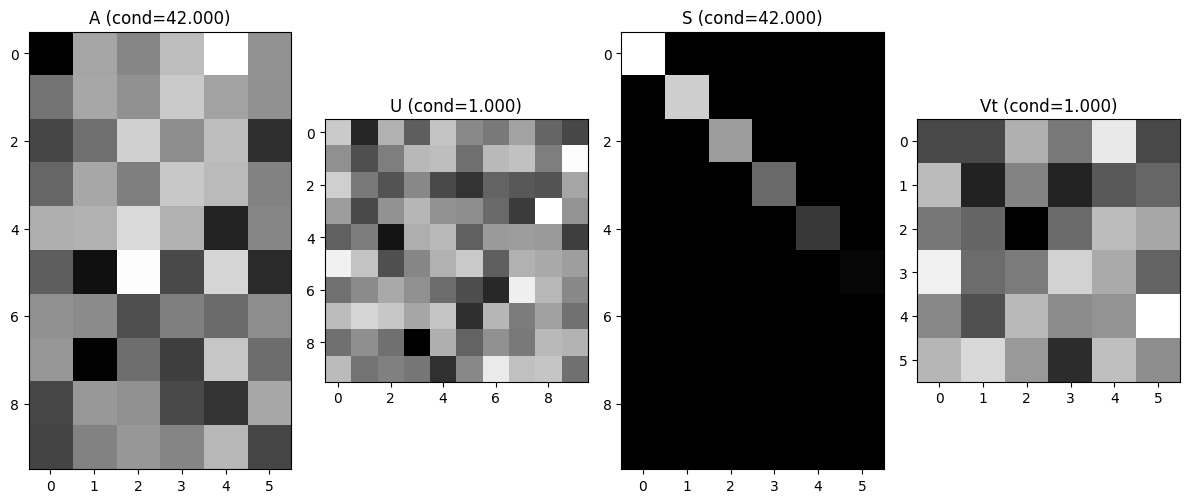

In [97]:
# Exercise 14-4 (Create a random tall matrix with a specified condition number)

import numpy as np
import matplotlib.pyplot as plt

# Set matrix dimensions and desired condition number
m = 10
n = 6
condnum = 42

# Create a random matrix and decompose it to get orthogonal matrices U and Vt
U, _, _ = np.linalg.svd(np.random.randn(m, m))
_, _, Vt = np.linalg.svd(np.random.randn(n, n))

# Create a singular values vector that linearly spans from the condition number to 1
s = np.linspace(condnum, 1, np.min((m, n)))

# Convert the singular values into a diagonal matrix S of appropriate size
S = np.zeros((m, n))
np.fill_diagonal(S, s)

# Create the matrix A by multiplying U, S, and Vt
A = U @ S @ Vt

# Visualization of the matrices and their condition numbers
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
titles = ['A', 'U', 'S', 'Vt']
matrices = [A, U, S, Vt]
conds = [np.linalg.cond(mat) for mat in matrices]

for ax, matrix, title, cond in zip(axs, matrices, titles, conds):
    im = ax.imshow(matrix, aspect='equal', cmap='gray')
    ax.set_title(f'{title} (cond={cond:.3f})')

plt.tight_layout()
plt.show()


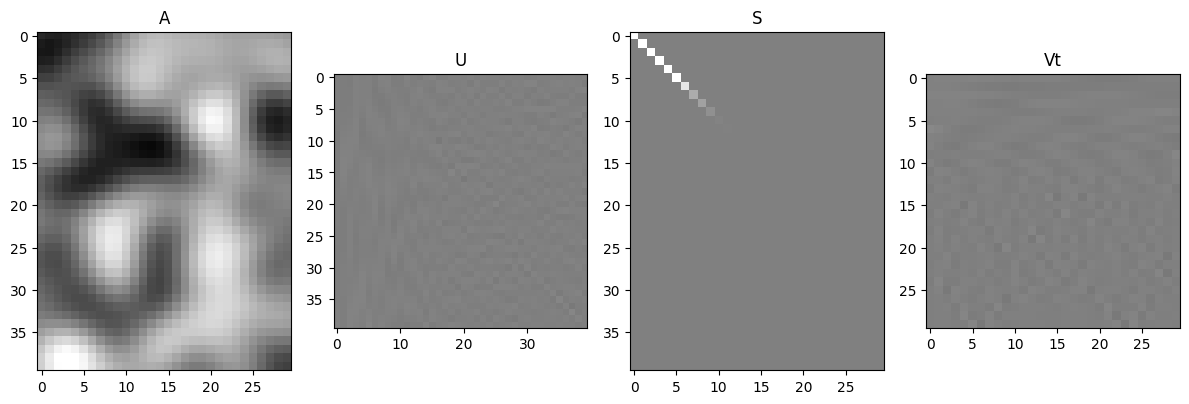

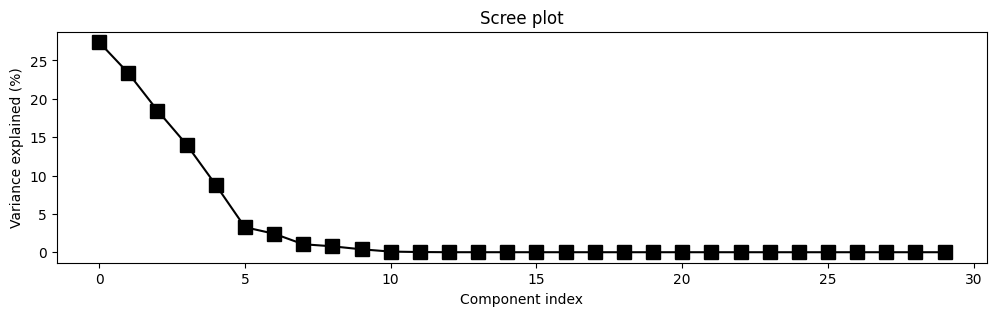

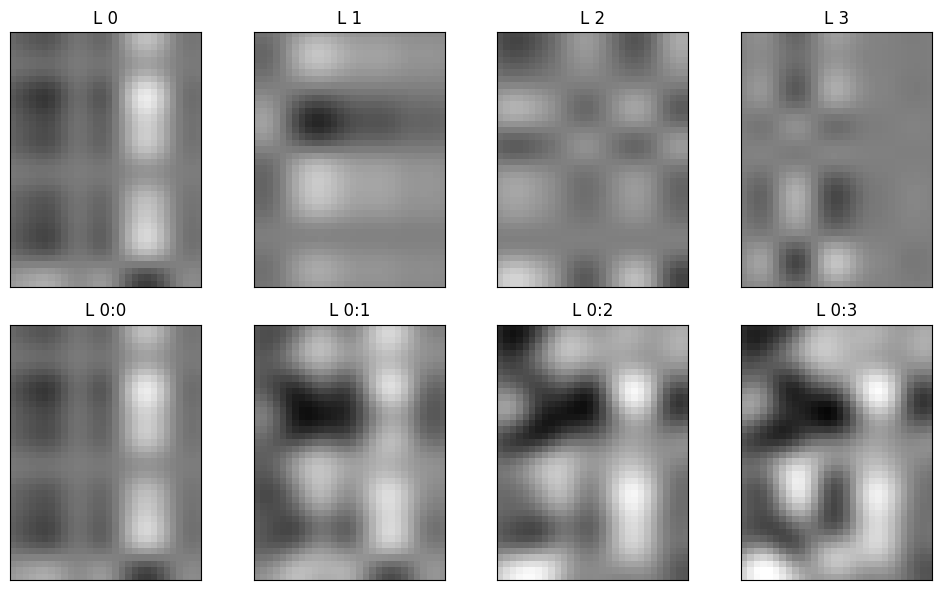

In [105]:
# Exercise 14-5 (Perform and visualize SVD on a smoothed random matrix)

def create_smoothed_matrix(m, n):
    # Define a 2D Gaussian for smoothing
    k = int((m + n) / 4)
    X, Y = np.meshgrid(np.linspace(-3, 3, k), np.linspace(-3, 3, k))
    g2d = np.exp(-(X**2 + Y**2) / (k / 8))

    # Create matrix and apply Gaussian smoothing
    A = convolve2d(np.random.randn(m, n), g2d, mode='same')
    return A

def perform_svd(A):
    # Perform SVD and create Sigma matrix
    U, s, Vt = np.linalg.svd(A)
    S = np.zeros_like(A)
    np.fill_diagonal(S, s)
    return U, s, Vt, S

def visualize_matrices(A, U, S, Vt):
    # Visualize the matrices
    _, axs = plt.subplots(1, 4, figsize=(12, 6))
    titles = ['A', 'U', 'S', 'Vt']
    matrices = [A, U, S, Vt]

    for ax, matrix, title in zip(axs, matrices, titles):
        im = ax.imshow(matrix, aspect='equal', cmap='gray', vmin=-10, vmax=10)
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

def plot_scree(s):
    # Show the scree plot
    plt.figure(figsize=(12, 3))
    plt.plot(100 * s / np.sum(s), 'ks-', markersize=10)
    plt.xlabel('Component index')
    plt.ylabel('Variance explained (%)')
    plt.title('Scree plot')
    plt.show()

def visualize_singular_layers(U, Vt, S, numLayers, m, n):
    # Show the first N "layers" separately and summed
    rank1mats = np.zeros((numLayers, m, n))
    _, axs = plt.subplots(2, numLayers, figsize=(10, 6))

    for i in range(numLayers):
        # Create this layer
        rank1mats[i, :, :] = np.outer(U[:, i], Vt[i, :]) * S[i, i]
        
        # Show this layer
        axs[0, i].imshow(rank1mats[i, :, :], cmap='gray', vmin=-10, vmax=10)
        axs[0, i].set_title(f'L {i}')
        axs[0, i].set_xticks([]), axs[0, i].set_yticks([])

        # Show the cumulative sum of layers
        axs[1, i].imshow(np.sum(rank1mats[:i+1, :, :], axis=0), cmap='gray', vmin=-10, vmax=10)
        axs[1, i].set_title(f'L 0:{i}')
        axs[1, i].set_xticks([]), axs[1, i].set_yticks([])

    plt.tight_layout()
    plt.show()

m, n = 40, 30
matrix_a = create_smoothed_matrix(m, n)
U, s, Vt, S = perform_svd(matrix_a)
visualize_matrices(matrix_a, U, S, Vt)
plot_scree(s)
visualize_singular_layers(U, Vt, S, 4, m, n)

In [111]:
# Exercise 14-6 (Implement MP psuedo-inverse)

matrix_a = np.random.randn(5, 3)
matrix_b = np.random.randn(3, 5)
rank_3_matrix = matrix_a @ matrix_b

def compute_pseudoinverse(matrix):
    """Compute the Moore-Penrose pseudoinverse of a matrix."""
    # Decompose the matrix using SVD
    U, singular_values, Vt = np.linalg.svd(matrix)
    
    # Define a tolerance to determine negligible singular values
    tolerance = np.finfo(float).eps * max(matrix.shape)
    
    # Invert all singular values above the tolerance
    singular_values_inv = 1 / singular_values[singular_values > tolerance]
    
    # Create a diagonal matrix of the inverted singular values
    S_inv = np.diag(np.concatenate([singular_values_inv, np.zeros(max(matrix.shape) - len(singular_values_inv))]))
    
    # Compute the pseudoinverse using the formula Vt.T * S_inv * U.T
    return Vt.T @ S_inv @ U.T

my_psuedo_inverse = compute_pseudoinverse(rank_3_matrix)
numpy_psuedo_inverse = np.linalg.pinv(rank_3_matrix)

check = np.allclose(my_psuedo_inverse, numpy_psuedo_inverse)
print("My implementation of the MP psuedo-inverse algorithm matched the output of numpy's implementation:", check)

My implementation of the MP psuedo-inverse algorithm matched the output of numpy's implementation: True


In [123]:
# Exercise 14-7 (Confirm that the MP psuedo-inverse equals the left-inverse for a full column rank matrix, and a full rank row matrix)

# Tall matrix
tall_matrix_a = np.random.randn(5, 3)

left_inverse = np.linalg.inv(tall_matrix_a.T @ tall_matrix_a) @ tall_matrix_a.T
psuedo_inverse = np.linalg.pinv(tall_matrix_a)

check_1 = np.allclose(left_inverse, psuedo_inverse)
print("The explicit left-inverse and psuedo-inverse of a tall matrix are the same:", check_1)

# Wide matrix
wide_matrix_a = np.random.randn(3, 5)

right_inverse = wide_matrix_a.T @ np.linalg.inv(wide_matrix_a @ wide_matrix_a.T)
psuedo_inverse = np.linalg.pinv(wide_matrix_a)

check_2 = np.allclose(right_inverse, psuedo_inverse)
print("The explicit right-inverse and psuedo-inverse of a wide matrix are the same:", check_2)

The explicit left-inverse and psuedo-inverse of a tall matrix are the same: True
The explicit right-inverse and psuedo-inverse of a wide matrix are the same: True


In [162]:
# Exercise 14-8 (Manipulating eigenvalue equation with psuedo-inverse)

matrix_a = np.array([
    [1, 2],
    [3, 4]
])

# Perform eigendecomposition
evals, evecs = np.linalg.eig(matrix_a)
eval_1 = evals[1]
evec_1 = evecs[:,[1]]


# Confirm frist eigenvector times its psuedo-inverse equals the identity matrix
check_1 = np.allclose(np.linalg.pinv(evec_1) @ evec_1, np.eye(1))
print("The eigenvectors times their psuedo-inverse equal the identity matrix:", check_1)

# Confirm first equation
left_side_1 = np.linalg.pinv(evec_1) @ matrix_a @ evec_1
right_side_1 = eval_1 * np.linalg.pinv(evec_1) @ evec_1
check_2 = np.allclose(left_side_1, right_side_1)
print("Both sides of the first equation are equal:", check_2)

# Confirm second equation
left_side_2 = matrix_a @ evec_1 @ np.linalg.pinv(evec_1)
right_side_2 = eval_1 * evec_1 @ np.linalg.pinv(evec_1)
check_3 = np.allclose(left_side_2, right_side_2)
print("Both sides of the second equation are equal:", check_3)

The eigenvectors times their psuedo-inverse equal the identity matrix: True
Both sides of the first equation are equal: True
Both sides of the second equation are equal: True
